In [15]:
import numpy as np
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
param = 'DipIntegral'
file = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/meanbrain_' + param +'_ROI_aged.csv'
df = pd.read_csv(file)

df
df2_mean = df.mean(axis=1, numeric_only=True).to_numpy()

df_mean = df.drop(['TR', 'final_mat_1', 'final_mat_2', 'final_mat_53'], axis=1)
df["Mean_ROI"] = df_mean.mean(axis=1)

df = df.loc[ df['TR'] >= 3]
# print(len(df))

df = df.loc[ df.final_mat_53 !=0]
# print(len(df))

df = df.dropna()
print(len(df))

df2 = df.copy()

1266


In [4]:
# print(df2['final_mat_53'].to_numpy())

In [5]:
def remove_outlier(df, index):
    Q1 = df[index].quantile(0.25)
    Q3 = df[index].quantile(0.75)

    IQR = Q3 - Q1

    filter = (df[index] >= Q1 - 1.5*IQR) &  (df[index] <= Q3 + 1.5*IQR)
    outlier =  (df[index] <= Q1 - 1.5*IQR) |  (df[index] >= Q3 + 1.5*IQR)
    
    return df.loc[filter], df.loc[outlier]

def custom_round(x, base=5):
    return int(base * round(float(x)/base))

In [6]:
n_feature=7
n_roi = 2
pval=  0.05/(n_feature * n_roi)

In [16]:
df_clean, df_outlier = remove_outlier(df2, 'Mean_ROI')

In [9]:
df_clean

final_mat_1          final_mat_2  final_mat_3  final_mat_4  \
0     VUIISXNAT04_S16962  VUIISXNAT04_E230871    -0.899163    -0.871828   
1     VUIISXNAT04_S16962  VUIISXNAT04_E231331    -0.802105    -1.095680   
2     VUIISXNAT04_S16963  VUIISXNAT04_E230872    -0.908586    -0.757066   
4     VUIISXNAT04_S16963  VUIISXNAT04_E231332    -0.735695    -0.715475   
5     VUIISXNAT04_S16963  VUIISXNAT04_E231466    -0.706474    -1.611310   
...                  ...                  ...          ...          ...   
1429  VUIISXNAT04_S17527  VUIISXNAT04_E232122    -1.216450    -0.918066   
1430  VUIISXNAT04_S17527  VUIISXNAT04_E232524    -0.897065    -1.338600   
1432  VUIISXNAT04_S17535  VUIISXNAT04_E232546    -0.987357    -0.717060   
1440  VUIISXNAT04_S17680  VUIISXNAT04_E232518    -0.301729    -0.476762   
1442  VUIISXNAT04_S17764  VUIISXNAT04_E232790    -0.656932    -0.457961   

      final_mat_5  final_mat_6  final_mat_7  final_mat_8  final_mat_9  \
0       -1.215070    -1.402960    -1.134130    -1.247000    -0.837638   
1       -0.836173    -0.702728    -0.725763    -0.092035    -1.111070   
2       -0.826707    -1.194960    -1.051890    -1.792540    -0.546182   
4       -0.890995    -1.029390    -1.647670    -2.406920    -0.585124   
5       -0.816492    -1.205940    -1.092520    -3.495480    -0.951251   
...           ...          ...          ...          ...          ...   
1429    -0.864715    -1.071860    -1.517050    -0.435993    -0.784363   
1430    -1.220020    -1.078850    -0.862671    -0.614804    -0.789560   
1432    -0.474798    -0.721643    -1.007770    -1.252370    -0.966388   
1440    -0.491086    -0.702425    -1.116810    -0.970754    -0.399650   
1442    -0.693745    -1.275120    -3.696380    -1.558800    -0.520004   

      final_mat_10  ...  final_mat_46  final_mat_47  final_mat_48  \
0        -1.083750  ...     -0.276899     -0.986875     -0.638871   
1        -0.736381  ...     -0.432644     -1.021300     -0.726366   
2        -1.318770  ...     -0.648017     -0.819439     -0.509914   
4        -0.692775  ...     -0.764962     -1.195170     -0.710748   
5        -0.946179  ...     -0.489598     -0.618831     -0.849490   
...            ...  ...           ...           ...           ...   
1429     -0.867202  ...     -0.369885     -0.424343     -0.599956   
1430     -1.226510  ...     -0.927224     -0.938351     -0.936691   
1432     -0.599468  ...     -0.721803     -0.488552     -0.796007   
1440     -0.463582  ...     -0.733567     -0.438578     -1.234880   
1442     -0.268304  ...     -0.794809     -0.510948     -0.666305   

      final_mat_49  final_mat_50  final_mat_51  final_mat_52     TR  \
0        -0.966455     -0.620125     -0.947542     -1.063080  3.000   
1        -0.593865     -0.926261     -0.342047     -0.355895  3.001   
2        -0.764263     -1.045220     -0.692855     -1.986390  3.000   
4        -0.789545     -0.479032     -0.797194     -1.210110  3.001   
5        -0.346611     -0.531254     -0.887653     -1.208310  3.001   
...            ...           ...           ...           ...    ...   
1429     -0.394339     -0.935324     -0.467454     -0.761586  3.000   
1430     -1.085610     -0.343220     -1.073690     -0.444649  3.000   
1432     -0.815125     -0.940842     -0.800308     -1.570970  3.000   
1440     -0.561868     -1.548850     -1.368590     -1.147100  3.000   
1442     -0.397441     -0.647631     -1.067960     -1.871690  3.000   

      final_mat_53  Mean_ROI  
0             90.0 -0.858651  
1             91.0 -0.756821  
2             81.5 -0.958833  
4             82.4 -0.973310  
5             83.4 -1.090345  
...            ...       ...  
1429          81.5 -1.024002  
1430          82.4 -1.051400  
1432          71.7 -0.920493  
1440          85.6 -0.753146  
1442          68.4 -1.061156  

[1170 rows x 55 columns]

In [10]:
# plt.figure(figsize=(30,10))
# plt.subplot(1,3,1)
# ax = sns.regplot(x=df2.final_mat_53, y=df.Mean_ROI)
# plt.title('Mean ROI')
# plt.subplot(1,3,2)
# ax = sns.regplot(x=df_clean.final_mat_53, y=df_clean.Mean_ROI)
# plt.title('Mean ROI outliers removed')
# plt.subplot(1,3,3)
# ax = sns.regplot(x=df_outlier.final_mat_53, y=df_outlier.Mean_ROI)
# plt.title('Mean ROI outliers')

# print(np.round(stats.pearsonr(df_clean['final_mat_53'], df_clean['Mean_ROI']), decimals=5))

## GM and WM plot

In [11]:
# fig = plt.figure(figsize=(20, 10))
# name = ['GM', 'WM']

# for i in range(1,3):
#   # name = i+2
#   plt.subplot(1,2,i)
#   index = 'final_mat_' + str(i+2)
#   # df_tmp = df2.copy()
#   df_tmp = remove_outlier(df2, index)
#   ax = sns.regplot(x="final_mat_53", y=index, data=df_tmp)

  # r, p = np.round(stats.pearsonr(df_tmp['final_mat_53'], df_tmp[index]), decimals=10)

  # pval=  np.round(0.05/(n_feature * n_roi), decimals=3)
  # # print(r, p)
  # plt.xlabel("age")
  # plt.ylabel("Height")
  # tit = "average of Height in "+ name[i-1]+ ": corr = " +str( np.round(r, decimals=3)) + "  pval = " + str(p) + " < " + str(pval)
  # plt.title(tit)


## Analysis feature per roi across age

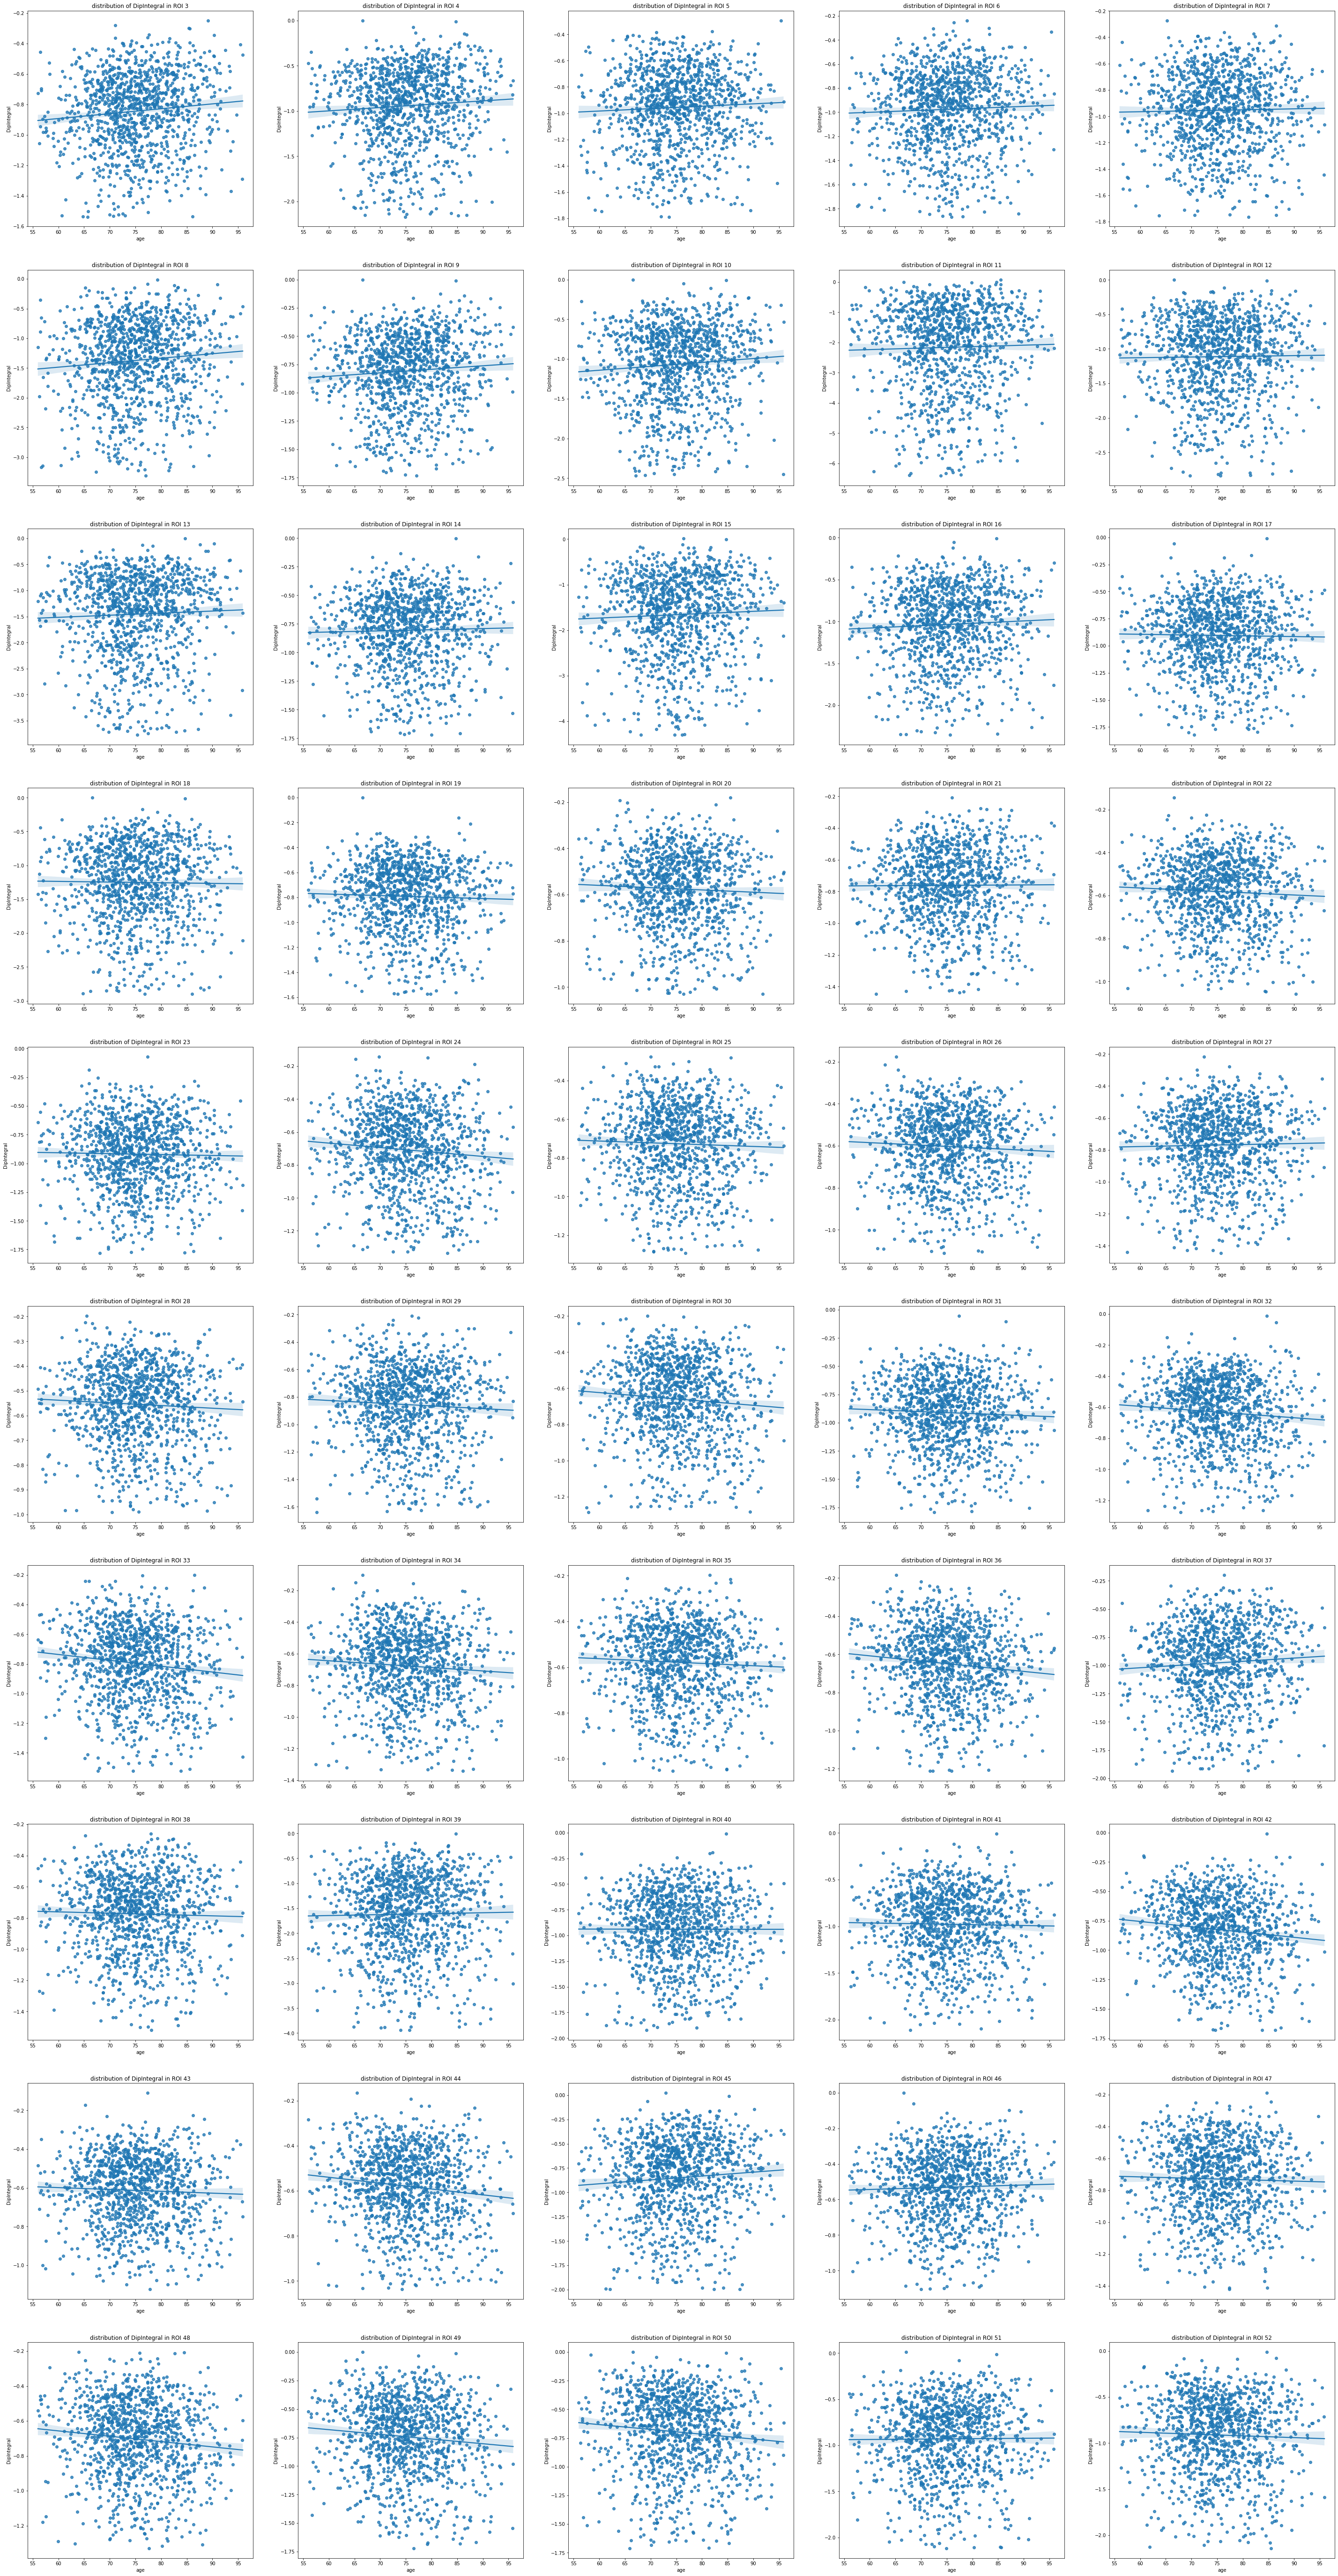

In [12]:
fig = plt.figure(figsize=(50,100))
good_roi = []

j = 1
for i in  range(3,53):
  name = i
  index = 'final_mat_' + str(name)
  plt.subplot(10,5, j)
  j +=1


  df_tmp, df_outlier = remove_outlier(df_clean, index)
  # df_tmp = df_clean.copy()

  # x = df_clean['final_mat_53'].to_numpy()
  # y = df_tmp[index].to_numpy()

  pal = sns.color_palette()

  # df_tmp = df_tmp.loc[ df_tmp[index] > 0]


  sns.regplot(x='final_mat_53', y=index, data=df_tmp)
  # sns.histplot(df_tmp[index], color= pal[1], alpha = 0.3,label='clean 2', kde=True)

  # ax = sns.histplot(x=x, y=y, data=df_tmp)
  # df[index].hist()
  r, p = np.round(stats.pearsonr(df_tmp['final_mat_53'], df_tmp[index]), decimals=5)
  
  char = '<'
  if p > pval: 
    char = '>'

  tit = "average of {} in ROI {} : corr = {:.3f} pval = {:.1e} {} {:.1e}".format(param, i, r, p, char, pval)
  tit = 'distribution of {} in ROI {}'.format(param, i,)
  plt.title(tit)
  # plt.axis([55, 95, -3, 0]) # for dipHeight
  plt.xlabel("age")
  plt.ylabel("{}".format(param))


In [ ]:
list_subject = []
list_exp = []
list_age = [] 
list_visit = [] # =vcode

## test influence Height, FWHM on PeakIntegral

In [ ]:
file = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/roi_analysis/csv/mean_PeakIntegral.csv'
df1 = pd.read_csv(file)
file = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/roi_analysis/csv/mean_FWHM.csv'
df2 = pd.read_csv(file)
file = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/roi_analysis/csv/mean_Height.csv'
df3 = pd.read_csv(file)
file = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/roi_analysis/csv/mean_DipHeight.csv'
df4 = pd.read_csv(file)
file = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/roi_analysis/csv/mean_DipIntegral.csv'
df5 = pd.read_csv(file)
file = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/roi_analysis/csv/mean_Time2peak.csv'
df6 = pd.read_csv(file)
file = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/roi_analysis/csv/mean_Time2dip.csv'
df7 = pd.read_csv(file)

In [ ]:
df7

Unnamed: 0         final_mat_1          final_mat_2  final_mat_3  \
0              0  VUIISXNAT04_S16962  VUIISXNAT04_E230871       5.1516   
1              1  VUIISXNAT04_S16962  VUIISXNAT04_E231331       5.2214   
2              2  VUIISXNAT04_S16963  VUIISXNAT04_E230872       5.1548   
3              3  VUIISXNAT04_S16963  VUIISXNAT04_E230896       5.3660   
4              4  VUIISXNAT04_S16963  VUIISXNAT04_E231332       5.1699   
...          ...                 ...                  ...          ...   
1318        1318  VUIISXNAT04_S17761  VUIISXNAT04_E232780       5.3995   
1319        1319  VUIISXNAT04_S17762  VUIISXNAT04_E232781       5.3506   
1320        1320  VUIISXNAT04_S17763  VUIISXNAT04_E232786       5.1886   
1321        1321  VUIISXNAT04_S17765  VUIISXNAT04_E232791       5.1378   
1322        1322  VUIISXNAT04_S17766  VUIISXNAT04_E232796       5.1409   

      final_mat_4     TR  final_mat_53  
0          5.1636  3.000          90.0  
1          5.2368  3.001          91.0  
2          5.1733  3.000          81.5  
3          5.3961  3.000          87.5  
4          5.2077  3.001          82.4  
...           ...    ...           ...  
1318       5.3904  3.000          67.9  
1319       5.3734  3.000          71.6  
1320       5.2163  3.000          76.9  
1321       5.1716  3.000          80.0  
1322       5.1343  3.000          85.3  

[1323 rows x 7 columns]

In [ ]:
data = {'PeakIntegral' : df1.final_mat_4, 'FWHM' : df2.final_mat_4, 'Height' : df3.final_mat_4,
        # 'DipIntegral' : df5.final_mat_4, 'Time2peak' : df6.final_mat_4, 'DipHeight' : df4.final_mat_4,
        # 'Time2dip' : df7.final_mat_4,
       }
df = pd.DataFrame(data=data)
df = df[(df != 0).all(1)]
df = df.dropna()

In [ ]:
plt.figure(figsize=(40,20))
plt.subplot(121)
df = remove_outlier(df, 'PeakIntegral')
df = remove_outlier(df, 'FWHM')
df = remove_outlier(df, 'Height')

# df = remove_outlier(df, 'DipIntegral')
# df = remove_outlier(df, 'DipHeight')

# df = remove_outlier(df, 'Time2dip')
# df = remove_outlier(df, 'Time2peak')

ax = sns.regplot(x="FWHM", y='PeakIntegral', data=df)
r, p = stats.pearsonr(df['FWHM'], df['PeakIntegral'])
tit = "FWHM vs. PeakIntegral : corr = {:.3f} pval = {:.3f}".format(r, p)
plt.title(tit)
  
plt.subplot(122)
ax = sns.regplot(x="Height", y='PeakIntegral', data=df)
r, p = stats.pearsonr(df['Height'], df['PeakIntegral'])
tit = "Height vs. PeakIntegral : corr = {:.3f} pval = {:.1e}".format( r, p)
plt.title(tit)


In [4]:
filedir = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/roi_analysis/csv/mean_'
params = ['ROI', 'Height', 'PeakIntegral','DipHeight', 'DipIntegral', 'FWHM', 'Time2peak', 'Time2dip']

In [5]:
sns.set_theme(context="talk")

In [64]:
import scipy.stats

In [8]:
def clean_dataframe(df, feature, index):
  df = df.loc[ df['TR'] >= 3]

  df = df[(df != 0).all(1)]
  df = df.dropna()

  if feature == 'FWHM':
    df = df.loc[df['final_mat_3'] > 6.5]

  if feature == 'Time2peak':
    df = df.loc[df['final_mat_3'] > 8]

  if feature == 'Time2dip':
    df = df.loc[df['final_mat_3'] > 3]

  df_inliers, df_outlier = remove_outlier(df, index)
  return df_inliers

In [15]:
print(  sns.color_palette("husl", 8))

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701), (0.8087954113106306, 0.5634700050056693, 0.19502642696727285), (0.5920891529639701, 0.6418467016378244, 0.1935069134991043), (0.19783576093349015, 0.6955516966063037, 0.3995301037444499), (0.21044753832183283, 0.6773105080456748, 0.6433941168468681), (0.22335772267769388, 0.6565792317435265, 0.8171355503265633), (0.6423044349219739, 0.5497680051256467, 0.9582651433656727), (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]


Text(0.5, 0.98, 'Distribution of Variables')

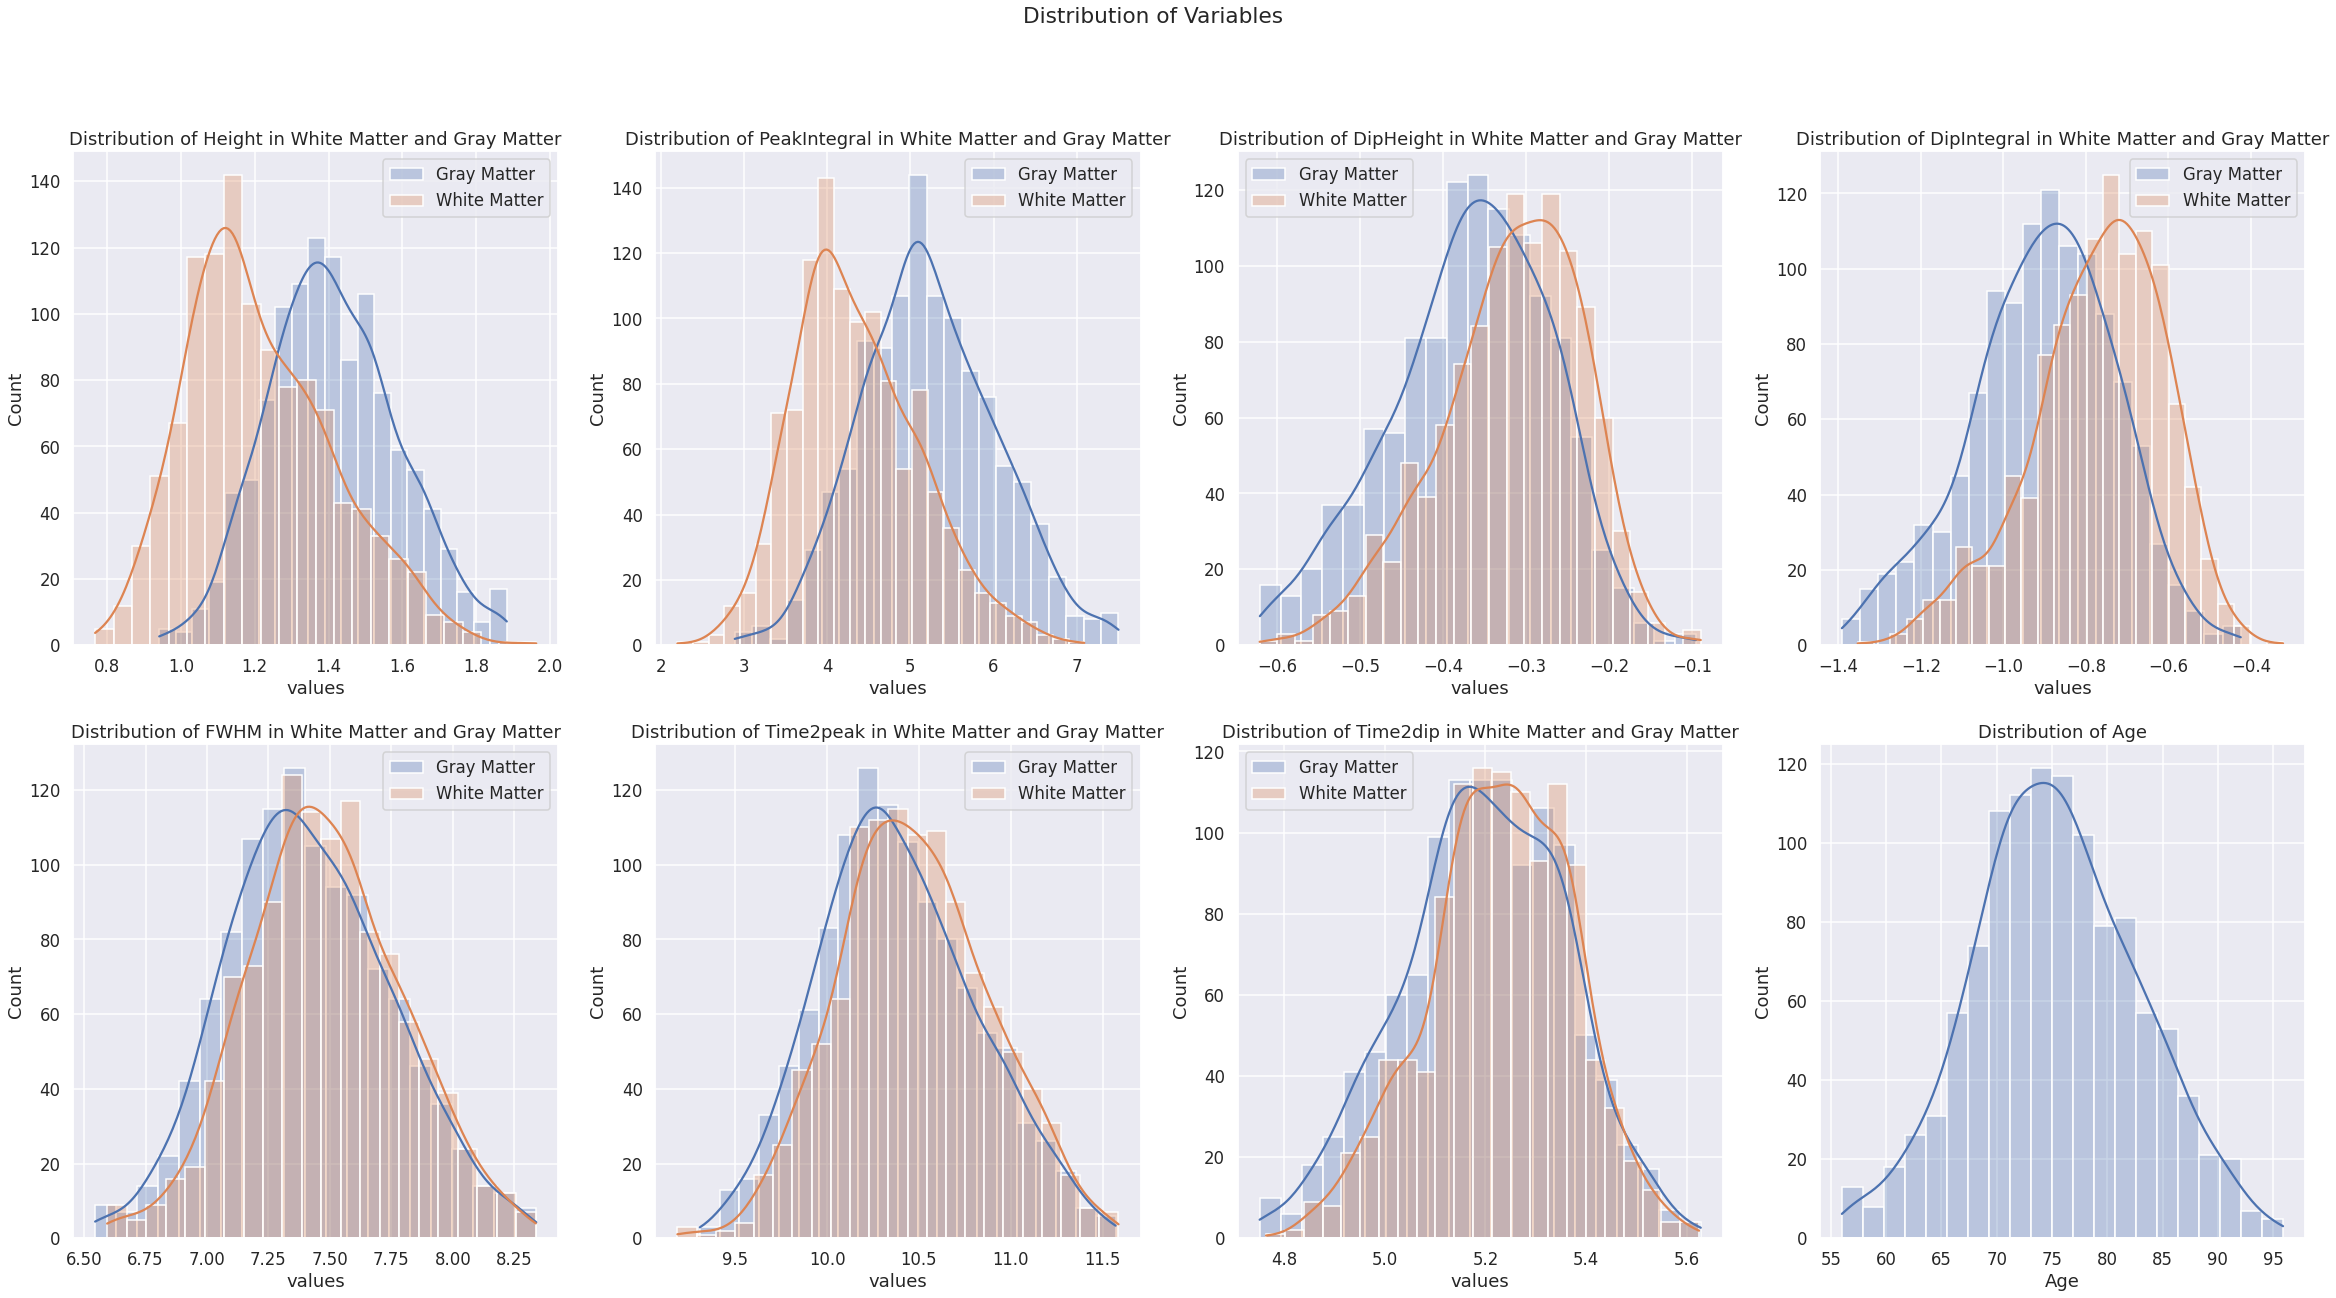

In [24]:
data = []
plt.figure(figsize=(40,20))
j=1
for feature in params[1:]:
  file = filedir + feature + '.csv'
  df = pd.read_csv(file)

  plt.subplot(2,4, j)
  j+=1

  # clean dataframe from outliers, nan ...
  pal = sns.color_palette()

  df_gm =clean_dataframe(df.copy(), feature, 'final_mat_3')
  sns.histplot(df_gm['final_mat_3'], color= pal[0], alpha = 0.3,label='Gray Matter', kde=True)
  sns.histplot(df_gm['final_mat_4'], color= pal[1], alpha = 0.3,label='White Matter', kde=True)

  plt.xlabel('values')
  # plt.ylabel(feature)
  plt.title('Distribution of {} in White Matter and Gray Matter'.format(feature))
  plt.legend()

plt.subplot(2,4, 8)

df_gm =clean_dataframe(df.copy(), feature, 'final_mat_3')
sns.histplot(df_gm['final_mat_53'], color= pal[0], alpha = 0.3, kde=True)

plt.xlabel('Age')
# plt.ylabel(feature)
plt.title('Distribution of Age')

plt.suptitle("Distribution of Variables")

Text(0.5, 0.98, 'Feature Analysis in White and Gray Matter')

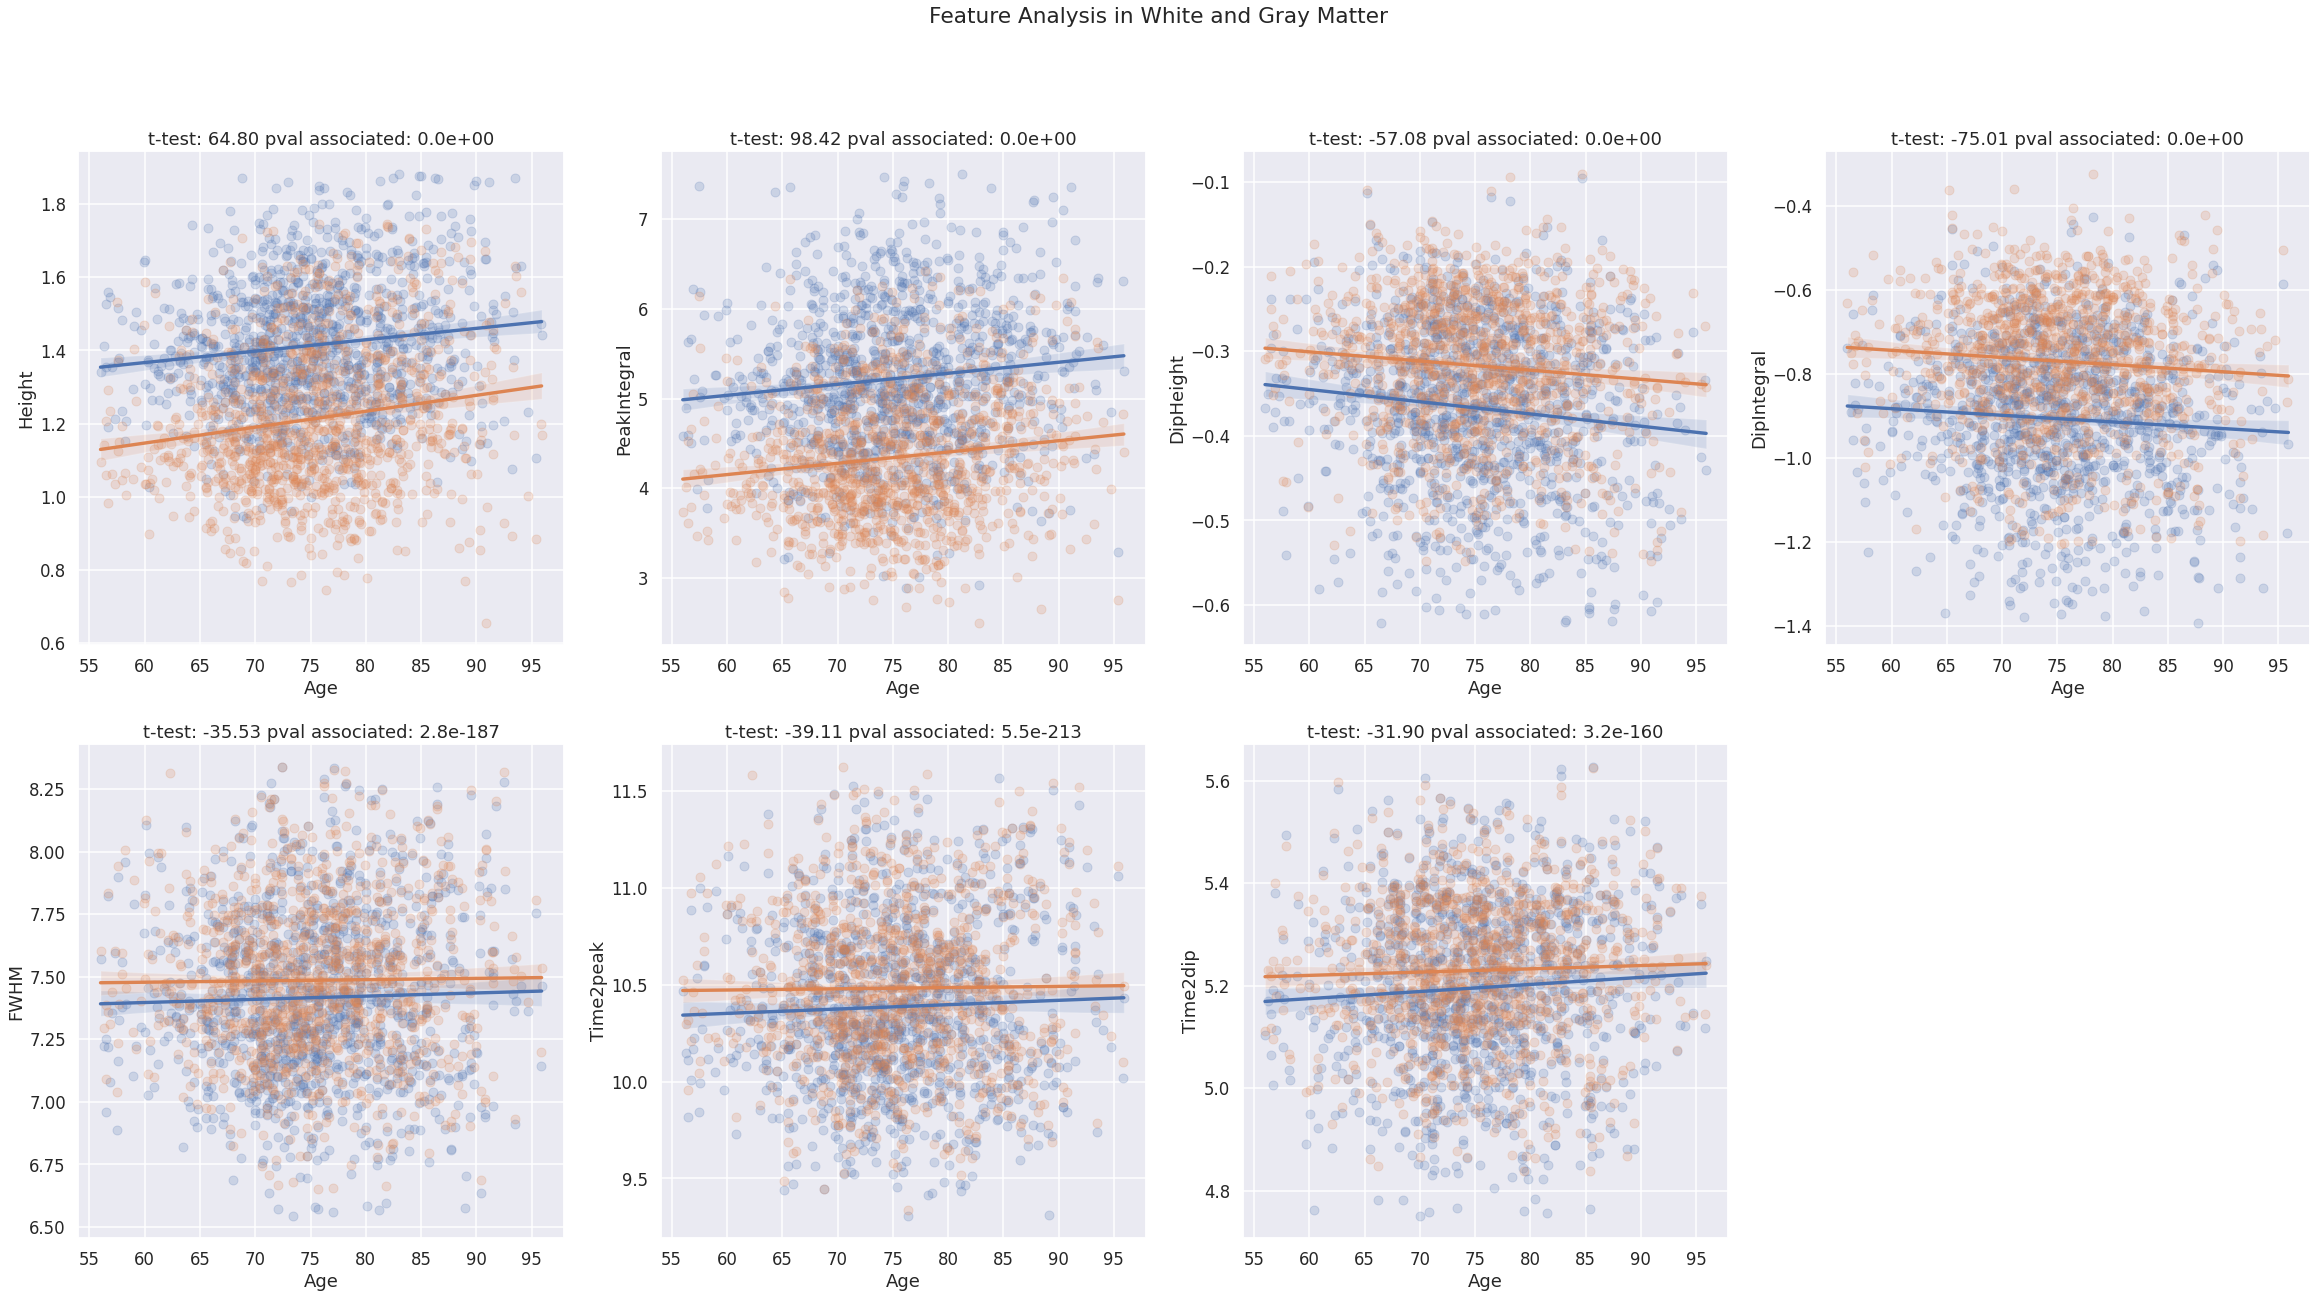

In [248]:
data = []
plt.figure(figsize=(40,20))
j=1
for feature in params[1:]:
  file = filedir + feature + '.csv'
  df = pd.read_csv(file)

  plt.subplot(2,4, j)
  j+=1

  # clean dataframe from outliers, nan ...
  
  df_gm =clean_dataframe(df.copy(), feature, 'final_mat_3')
  df_wm = clean_dataframe(df.copy(), feature, 'final_mat_4')

  # ask if there is correlation between the feature value and age
  r_gm, p_gm = np.round(stats.pearsonr(df_gm['final_mat_53'], df_gm['final_mat_3']), decimals=5)
  r_wm, p_wm = np.round(stats.pearsonr(df_wm['final_mat_53'], df_wm['final_mat_4']), decimals=5)

  # linear regression - feature changes across age
  legend_gm = "Gray Matter: corr = {:.3f}, p = {:.1e} ".format(r_gm, p_gm)
  legend_wm = "White Matter: corr = {:.3f}, p = {:.1e} ".format(r_wm, p_wm)
  line1 = sns.regplot(x="final_mat_53", y='final_mat_3', data=df_gm, scatter_kws={'alpha':0.2}, label=legend_gm)
  line2 = sns.regplot(x="final_mat_53", y='final_mat_4', data=df_wm, scatter_kws={'alpha':0.2}, label=legend_wm)


  # df_wm["final_mat_3"].hist(bins="sturges")
  # # df_gm["final_mat_4"].hist(bins="sturges")

  # print(np.var(df_gm['final_mat_3'].to_numpy()), np.var(df_wm['final_mat_4'].to_numpy()))

  # ask if there is differences in mean between GM and WM --- with or without equal_var, doesn't change the value
  t, pval = scipy.stats.ttest_rel(df_gm['final_mat_3'], df_gm['final_mat_4'], axis=0)
  # t, pval = scipy.stats.ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='two-sided')
  # characterizes of the changes of the difference with age
  
  plt.xlabel('Age')
  plt.ylabel(feature)
  plt.title("t-test: {:.2f} pval associated: {:.1e}".format(t, pval))

plt.suptitle("Feature Analysis in White and Gray Matter")

### Other

In [43]:
input_dir ='/home/local/VANDERBILT/dolel/Documents/rsHRF_project/ADNI_23/'
file = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/txt/list_age_subject_experiment.csv'
file2age ='/home/local/VANDERBILT/dolel/Documents/rsHRF_project/idaSearch_3_26_2022_XNAT_addColumns.csv'
df2 = pd.read_csv(file)
df=pd.read_csv(file2age)

In [24]:
import os
import json 
import h5py

In [34]:
list_TR = []
list_manufacturer = []
list_model = []
list_HRF_length = []
list_subjects = []
list_exp = []

for subject in os.listdir(input_dir):
    subject_dir = os.path.join(input_dir, subject)
    for experiment in os.listdir(subject_dir):
        exp_dir = os.path.join(subject_dir, experiment)

        try:
            # folders_exp = os.listdir(exp_dir)
            # fold_dir = folders_exp[1] if folders_exp[0] == 'func' else folders_exp[0]

            # file_mat = exp_dir + '/rsfmri/Deconv_Detrend_4DVolume_hrf.mat'
            json_dir = exp_dir + "/anat/"

            for file in os.listdir(json_dir):
                name, ext = os.path.splitext(file)
            
                if ext == ".json":
                    filename = os.path.join(json_dir, file)
                    with open(filename) as f :
                        data = json.load(f)

                    # f = h5py.File(file_mat, 'r')
                    # data_mat = f.get('hrfa')
                    # data_mat = np.array(data_mat)

                    if data["ManufacturersModelName"]:                                        
                        model = data["ManufacturersModelName"]
                    else: 
                        model = 'NaN'

                    if data["Manufacturer"]:                                        
                        manufac = data["Manufacturer"]
                    else: 
                        manufac = 'NaN'
                    
                    if experiment:                                        
                        ex = experiment
                    else: 
                        ex = 'NaN'
                    
                    if subject:                                        
                        sub = subject
                    else: 
                        sub = 'NaN'
                    
                    
                    
                    list_manufacturer.append(manufac) 
                    list_exp.append(ex)
                    list_subjects.append(sub)
                    list_model.append(model)
                    # list_HRF_length.append(data_mat.shape[1])
                    # print(data_mat.shape)
        except:
            pass
            # list_model.append("NaN")
            # list_manufacturer.append("NaN")             

In [36]:
len(list_exp), len(list_model), len(list_manufacturer), len(list_subject)

(1878, 1878, 1878, 1449)

In [37]:
df = pd.DataFrame(data={
                    'experiment':list_exp,
                    'Model': list_model ,
                    'Manufacturer': list_manufacturer })

In [41]:
df.to_csv('/home/local/VANDERBILT/dolel/Documents/rsHRF_project/txt/experiments_scanners_associated.csv', index=False)

In [42]:
list_Phase = []
list_age = []
list_exp = []
list_subject = []
list_Weight= []
list_Sex = []
list_ResearchGroup = []

In [44]:
for subject in sorted(os.listdir(input_dir)):
    subject_dir = os.path.join(input_dir, subject)
    for experiment in os.listdir(subject_dir):
        exp_dir = os.path.join(subject_dir, experiment)
        try:
            scz_fold = os.path.join(exp_dir, 'Scz_OUTPUTS')
            for filename in os.listdir(scz_fold):
                name, ext = os.path.splitext(filename)

                if ext == '.txt':
                    list_char = filename.split('-')

                    visit = list_char[4].split('_Visit')[1]
                    name = list_char[4].split('_Visit')[0]
                    sid = name.split('S_')[1]

                    df_sub_exp = df.loc[ (df['sID'] == int(sid))] # & (df['vcode'] == float(visit))]
                    print(df_sub_exp)

                    list_subject.append(subject)
                    list_exp.append(experiment)
                    if not df_sub_exp['Age'].empty:
                        age = df_sub_exp['Age']
                        tmp = age.to_numpy()
                        list_age.append(tmp[0])
                        
                        Phase = df_sub_exp['Phase']
                        tmp = Phase.to_numpy()
                        list_Phase.append(tmp[0])

                        Weight = df_sub_exp['Weight']
                        tmp = Weight.to_numpy()
                        list_Weight.append(tmp[0])

                        Sex = df_sub_exp['Sex']
                        tmp = Sex.to_numpy()
                        list_Sex.append(tmp[0])


                        ResearchGroup = df_sub_exp['ResearchGroup']
                        tmp = ResearchGroup.to_numpy()
                        list_ResearchGroup.append(tmp[0])   

                    else:
                        list_age.append('NaN')
                        list_Phase.append('Nan')
                        list_Sex.append('Nan')
                        list_Weight.append('Nan')
                        list_ResearchGroup.append('Nan')

                        # print(subject, experiment, sid, visit)
        except:
            # print(exp_dir)
            pass
                

    SubjectID  sID                       SubjectIDAndVisit   Phase Sex  \
0  002_S_0295  295  002_S_0295 ADNI2 Initial Visit-Cont Pt  ADNI 2   M   
1  002_S_0295  295           002_S_0295 ADNI2 Year 1 Visit  ADNI 2   M   

   Weight ResearchGroup  APOEA1  APOEA2                        Visit  vcode  \
0    73.0            CN     3.0     4.0  ADNI2 Initial Visit-Cont Pt     26   
1    69.9            CN     3.0     4.0           ADNI2 Year 1 Visit     28   

   StudyDate ArchiveDate   Age  GlobalCDR  NPI_QTotalScore  MMSETotalScore  \
0   6/2/2011    6/2/2011  90.0        0.0              NaN            28.0   
1  5/10/2012   5/11/2012  91.0        0.0              NaN            22.0   

   GDSCALETotalScore  FAQTotalScore  PTEDUCAT  
0                1.0            0.0       NaN  
1                0.0            0.0       NaN  
    SubjectID  sID                       SubjectIDAndVisit   Phase Sex  \
0  002_S_0295  295  002_S_0295 ADNI2 Initial Visit-Cont Pt  ADNI 2   M   
1  002_S_029

In [47]:
df_out = pd.DataFrame(data={'subject':list_subject,
                            'experiment': list_exp,
                            'age': list_age,
                            'Study': list_Phase,
                            'Weight': list_Weight,
                            'Sex': list_Sex,
                            'ResearchGroup': list_ResearchGroup
                        })

output_file= '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/list_params_subject_experiment_v2.csv'
df_out.to_csv(output_file, index=False)

In [50]:
np.unique(np.array(list_ResearchGroup))

array(['AD', 'CN', 'EMCI', 'LMCI', 'MCI', 'Nan', 'SMC'], dtype='<U4')